
**I have used some functions from my previous code.** 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound
def Audio_plotter(sound_file,sound_new,m):#soundfile is the required audio file name
    # here f = m* fs
    sound = wave.open(sound_file,'r') # reading the sound file
    # Extract Raw Audio from Wav File
    signal = sound.readframes(-1)  #Reading the all the frames of audio signal into bytes
    s = np.frombuffer(signal,dtype=np.uint8) # converting bytes to nparray
    f_rate = sound.getframerate() # finding the framerate of the audio signal
    sound.close() 
    t = np.linspace(0,len(signal)/f_rate,num=len(signal)) #calculating timescale of the audio signal
    # Plotting the audio signal in time domain
    soundnew = wave.open(sound_new,'w')
    soundnew.setnchannels(1)             #setting channel
    soundnew.setsampwidth(1)             # setting sample width
    soundnew.setframerate(m*f_rate)      # setting framerate
    soundnew.writeframesraw(s)           # writing data
    soundnew.close()
    f1 = plt.figure(1) 
    plt.stem(t,s,use_line_collection=True)
    plt.xlabel('t') #labeling time
    plt.ylabel('X[t]') 
    plt.title('Audio signal of ' + str(sound_file)) 
    t2 = np.linspace(0,len(s)/(m*f_rate),num=len(s))
    f2 = plt.figure(2)
    plt.stem(t2,s,use_line_collection=True)
    plt.xlabel('t') #labeling time
    plt.ylabel('Xnew[t]') 
    plt.title('Audio signal of ' + str(sound_new))  
    plt.show()

 Now we are checking each wave file behaviour and commenting

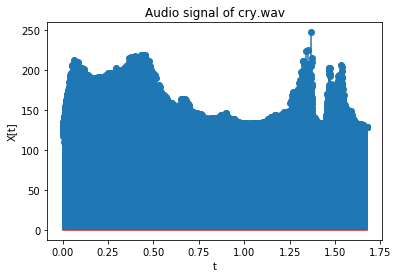

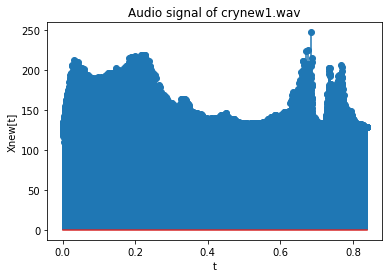

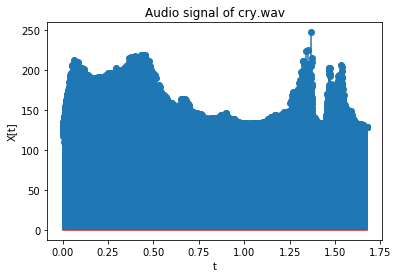

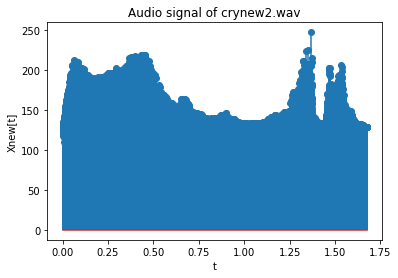

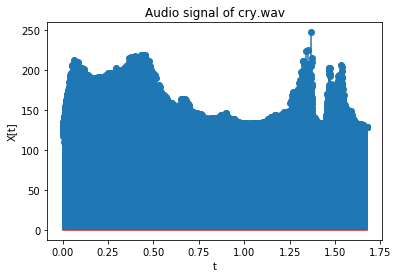

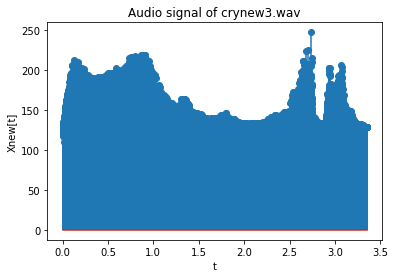

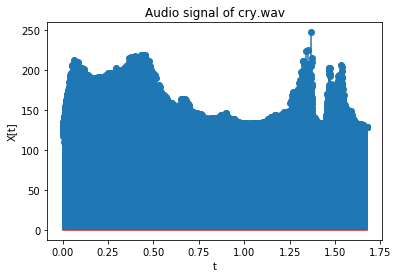

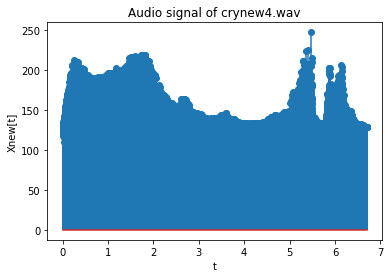

In [9]:
# 1-a plotting and playing audio at different frequencies.
Audio_plotter('cry.wav','crynew1.wav',2)
playsound('crynew1.wav')
Audio_plotter('cry.wav','crynew2.wav',1)
playsound('crynew2.wav')
Audio_plotter('cry.wav','crynew3.wav',0.5)
playsound('crynew3.wav')
Audio_plotter('cry.wav','crynew4.wav',0.25)
playsound('crynew4.wav')

# Observations 1-a
## For cry.wav :
> At $f$ = 2$f_{s}$ : <br>
The audio is clear but the duration is less.<br>
> At $f$ = $f_{s}$ :<br>
The audio is same.<br>
> At $f$ = 0.5$f_{s}$ :<br>
The audio is blurred ,slightly understandable and the duration is more.<br>
> At $f$ = 0.25$f_{s}$ :<br>
The audio is completely disoriented hard to understand and the duration is more.<br>


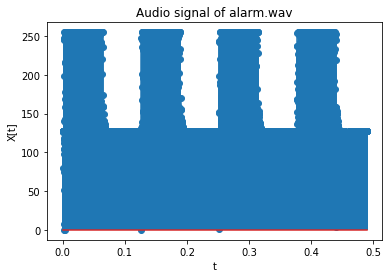

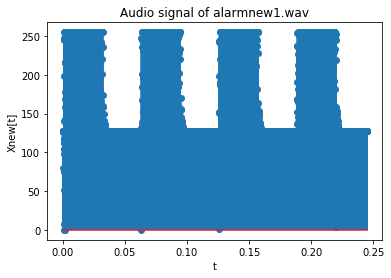

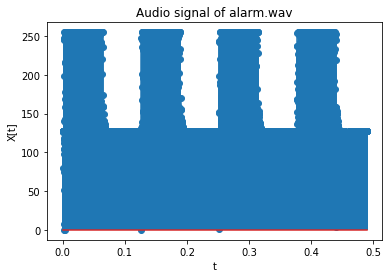

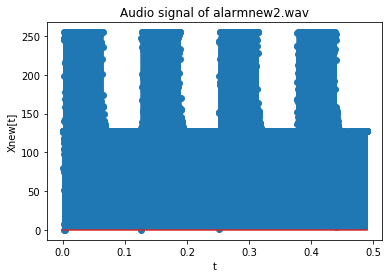

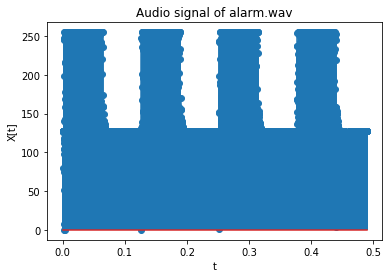

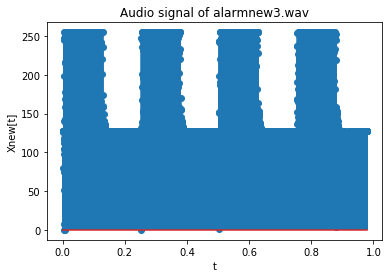

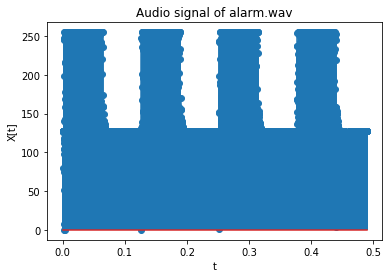

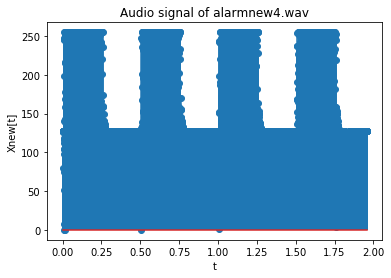

In [11]:
Audio_plotter('alarm.wav','alarmnew1.wav',2)
playsound('alarmnew1.wav')
Audio_plotter('alarm.wav','alarmnew2.wav',1)
playsound('alarmnew2.wav')
Audio_plotter('alarm.wav','alarmnew3.wav',0.5)
playsound('alarmnew3.wav')
Audio_plotter('alarm.wav','alarmnew4.wav',0.25)
playsound('alarmnew4.wav')


## For alarm.wav :
> At $f$ = 2$f_{s}$ : <br>
The audio is clear but the duration is less.<br>
> At $f$ = $f_{s}$ :<br>
The audio is same.<br>
> At $f$ = 0.5$f_{s}$ :<br>
The audio is clear ,understandable and the duration is more.<br>
> At $f$ = 0.25$f_{s}$ :<br>
The audio is little different but clear and the duration is more.<br>


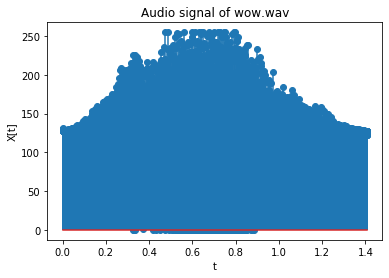

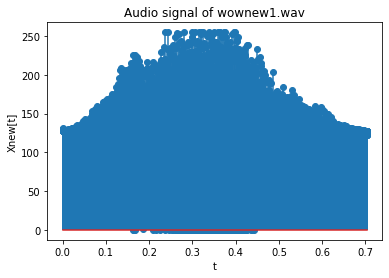

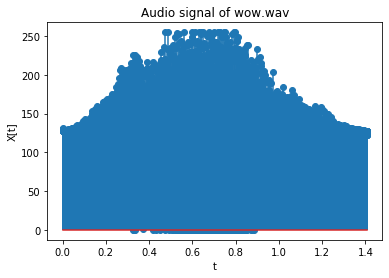

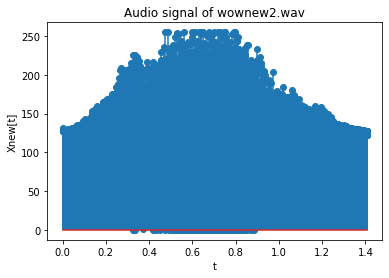

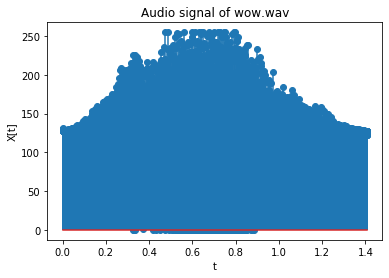

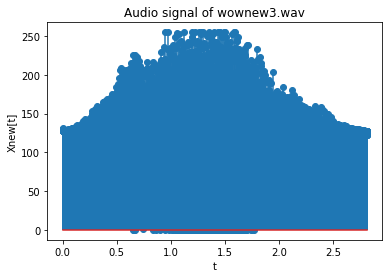

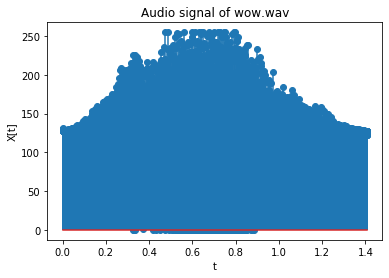

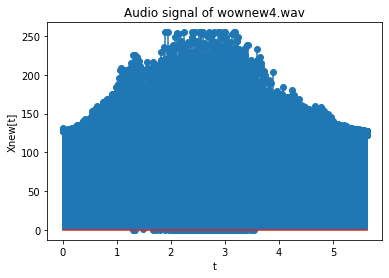

In [13]:
Audio_plotter('wow.wav','wownew1.wav',2)
playsound('wownew1.wav')
Audio_plotter('wow.wav','wownew2.wav',1)
playsound('wownew2.wav')
Audio_plotter('wow.wav','wownew3.wav',0.5)
playsound('wownew3.wav')
Audio_plotter('wow.wav','wownew4.wav',0.25)
playsound('wownew4.wav')


## For wow.wav :
> At $f$ = 2$f_{s}$ : <br>
The audio is clear but the duration is less.<br>
> At $f$ = $f_{s}$ :<br>
The audio is same.<br>
> At $f$ = 0.5$f_{s}$ :<br>
The audio is not clear,pitch is different and the duration is more.<br>
> At $f$ = 0.25$f_{s}$ :<br>
The audio is completely lagged , disoriented  and the duration is more.<br>


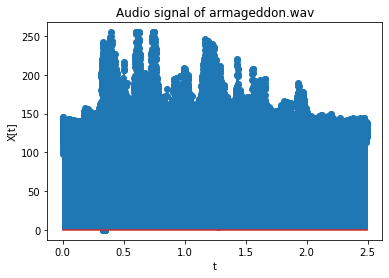

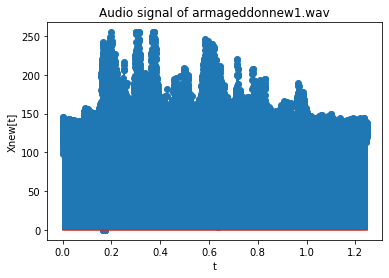

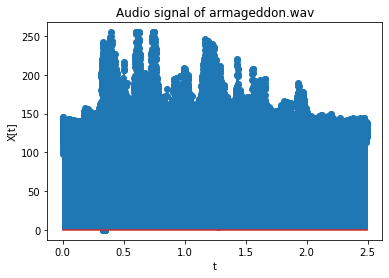

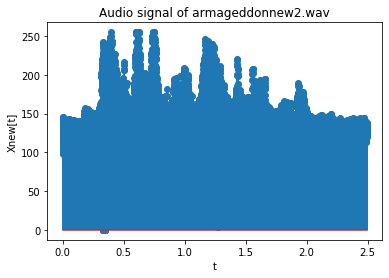

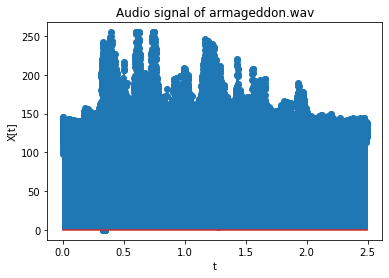

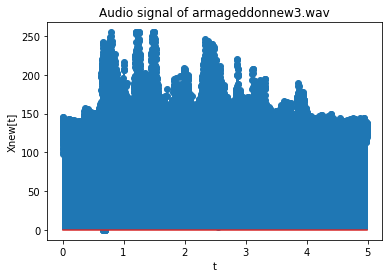

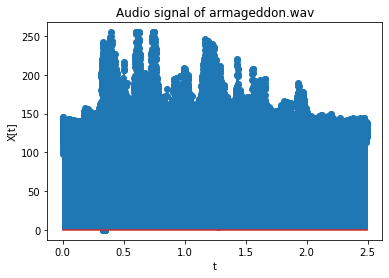

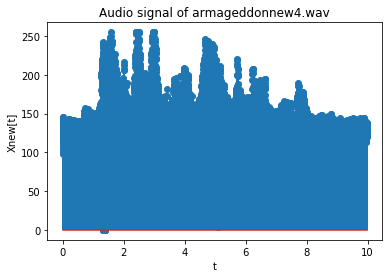

In [14]:
Audio_plotter('armageddon.wav','armageddonnew1.wav',2)
playsound('armageddonnew1.wav')
Audio_plotter('armageddon.wav','armageddonnew2.wav',1)
playsound('armageddonnew2.wav')
Audio_plotter('armageddon.wav','armageddonnew3.wav',0.5)
playsound('armageddonnew3.wav')
Audio_plotter('armageddon.wav','armageddonnew4.wav',0.25)
playsound('armageddonnew4.wav')


## For armageddon.wav :
> At $f$ = 2$f_{s}$ : <br>
The audio is not clear and the duration is less.<br>
> At $f$ = $f_{s}$ :<br>
The audio is same.<br>
> At $f$ = 0.5$f_{s}$ :<br>
The audio is little clear,pitch is different and the duration is more.<br>
> At $f$ = 0.25$f_{s}$ :<br>
The audio is completely lagged , disoriented  and the duration is more.<br>


In [ ]:
#1-b

def DTFT(sound_file,w):
    sound = wave.open(sound_file,'r') # reading the sound file
    # Extract Raw Audio from Wav File
    signal = sound.readframes(-1)  #Reading the all the frames of audio signal into bytes
    s = np.frombuffer(signal,dtype=np.uint8) # converting bytes to nparray
    f_rate = sound.getframerate() # finding the framerate of the audio signal
    sound.close() 
    t = np.linspace(0,len(signal)/f_rate,num=len(signal)) #calculating timescale of the audio signal
    s1 = [s[i] for i in range(int(f_rate*0.02))]     #extracting audio upto 20 milliseconds
    data = s1
    # Plotting the audio signal in time domain
    # data is the numpy array of signal, w is frequency,n is the sequence scale.
    N = len(w)                   # Number of points for w.
    DTFT = np.zeros(N)+np.ones(N)*1j          #Initializing DTFT
    for i in range(N):                        #computing DTFT
        dtft = 0
        for k in range(len(data)):
            dtft += data[k]*(np.cos(w[i]*k)+(np.sin(w[i]*k)*1j)) 
        DTFT[i]=dtft
    #MagnitudeSpectrum and Phase spectrum
    dtft_mag = [] #Magnitude Array
    dtft_phi = [] #Phase Array
    for i in range(N):#Calculating phase and magnitude
        dtft_mag+=[abs(DTFT[i])]#Magnitude = root(real^2 + img^2)
        dtft_phi+=[np.angle(DTFT[i],deg=True)]#Phase=arctan(img/real)
    #Magnitude plot
    f3 = plt.figure(3)
    plt.stem(w,dtft_mag,use_line_collection=True)
    plt.xlabel('w')
    plt.ylabel('|X(e^jw)|')
    plt.title('Magnitude Spectrum of '+str(sound_file))
    #Phase Plot
    f4= plt.figure(4)
    plt.stem(w,dtft_phi,use_line_collection=True)
    plt.xlabel('w')
    plt.ylabel('Phase(X(e^jw))')
    plt.title('Phase Spectrum of '+str(sound_file))
    plt.show()
    return(DTFT,dtft_mag,dtft_phi)

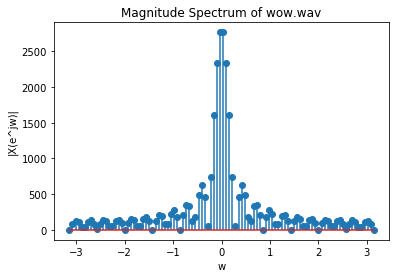

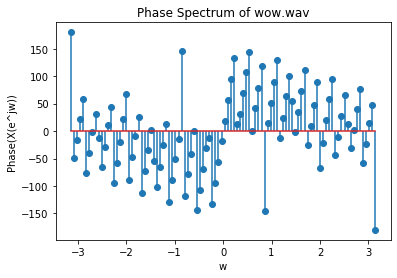

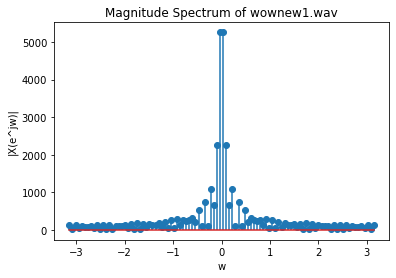

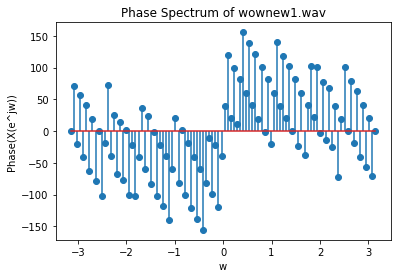

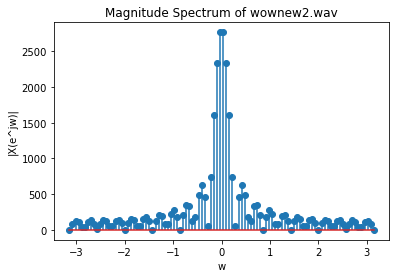

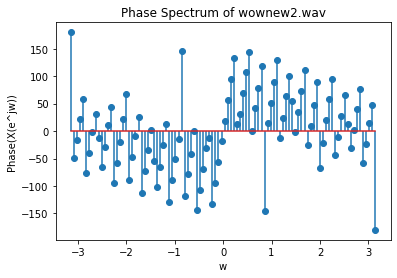

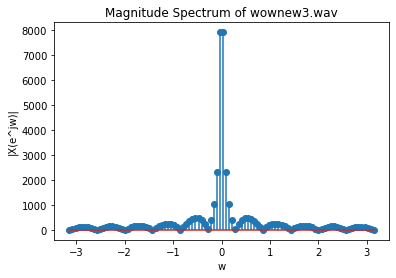

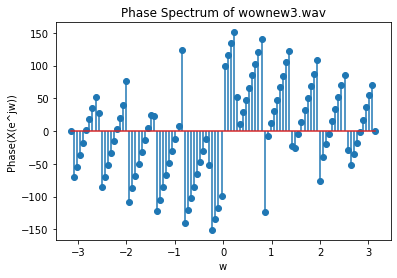

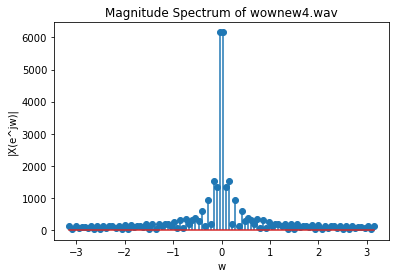

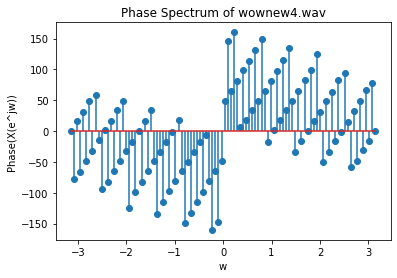

In [15]:
w_0 = np.linspace(-np.pi,np.pi,100) #frequency
a,b,c = DTFT('wow.wav',w_0)    # using DTFT function
c,d,e = DTFT('wownew1.wav',w_0)
m1,d1,e1 = DTFT('wownew2.wav',w_0)
m2,d2,e2 = DTFT('wownew3.wav',w_0)
m3,d3,e3 = DTFT('wownew4.wav',w_0)

# Observations 1-b
## For wow.wav: <br>
> At $f$ = 2$f_{s}$ : <br>
> The magnitude spectrum has lesser peaks but more amplitude in low frequency when compared to original wav file. <br>
> The phase spectrum there is an increase phase at some points and some peaks are reduced when compared  to original wavfile. <br>
<br>
> At $f$ = $f_{s}$  : <br>
> Both magnitude and phase spectrum are same as the original wave file. <br>
<br>
> At $f$ = 0.5$f_{s}$  : <br>
> The magnitude spectrum even lesser number of peaks but higher amplitude at low frequencies and more small peaks at higher frequencies when compared to original wave file.<br>
> The phase spectrum is a little repeatation and has more preaks at all frequencies when compared to original wave file. <br>
<br>
> At $f$ = 0.25$f_{s}$  : <br>
> The magnitude spectrum even lesser number of peaks but not higher amplitude at low frequencies compared to 0.5$f_{s}$ and more small peaks at higher frequencies when compared to original wave file.<br>
> The phase spectrum is similar to $f$ = 0.5$f_s$ but less number of high value peaks.

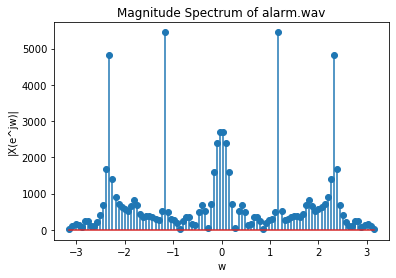

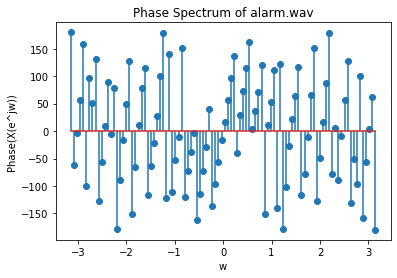

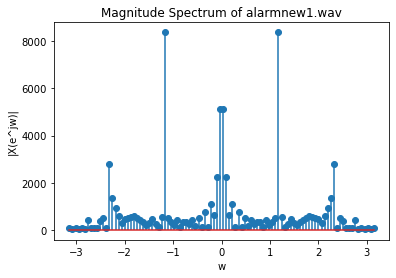

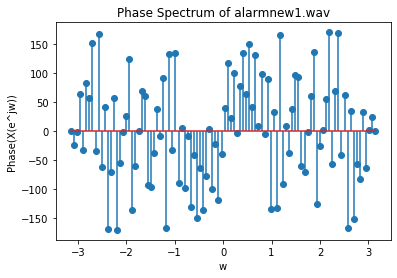

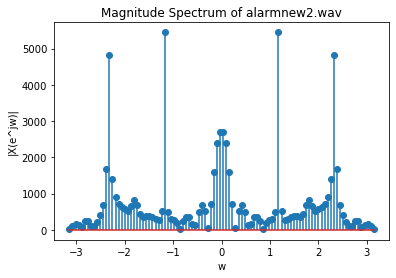

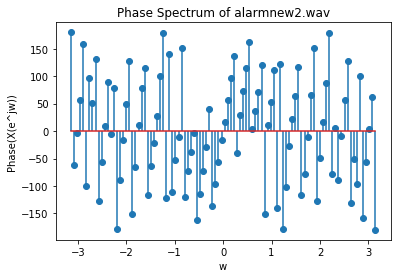

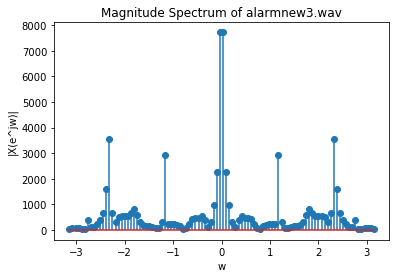

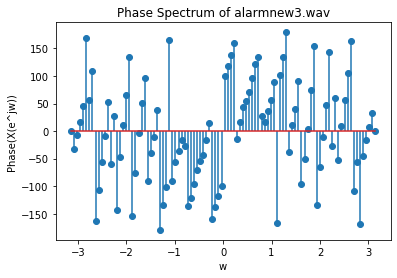

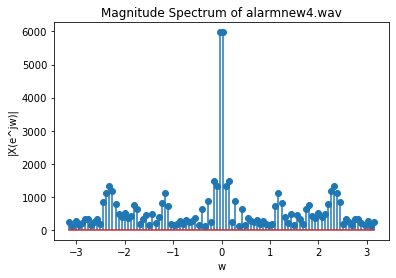

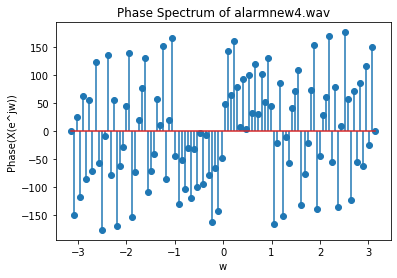

In [16]:
a1,b1,c1 = DTFT('alarm.wav',w_0)
a2,b2,c2 = DTFT('alarmnew1.wav',w_0)
a3,b3,c3 = DTFT('alarmnew2.wav',w_0)
a4,b4,c4 = DTFT('alarmnew3.wav',w_0)
a5,b5,c5 = DTFT('alarmnew4.wav',w_0)


## For alarm.wav: <br>
> At $f$ = 2$f_{s}$ : <br>
> The magnitude spectrum has peaks value more amplitude in low frequency typically around 1 Hz and less amplitude peak value at higher frequencies when compared to original wav file. <br>
> The phase spectrum is similar but there are changes in amplitude values w.r.t original wave file. <br>
<br>
> At $f$ = $f_{s}$  : <br>
> Both magnitude and phase spectrum are same as the original wave file. <br>
<br>
> At $f$ = 0.5$f_{s}$  : <br>
> The magnitude spectrum higher amplitude at low frequencies and more small peaks with lower amplitude at higher frequencies when compared to original wave file.<br>
> The phase spectrum is a little repeatation and has more preaks at all frequencies when compared to original wave file. <br>
<br>
> At $f$ = 0.25$f_{s}$  : <br>
> The magnitude spectrum has low amplitude at low frequencies  and has even low amplitude at higher frequencies compared to $f$ = 0.5$f_s$.<br>
> The phase spectrum also has low value and less number of peaks compared to $f$ = 0.5$f_s$.<br>

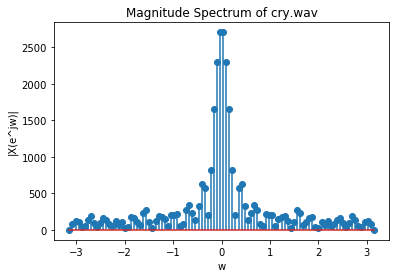

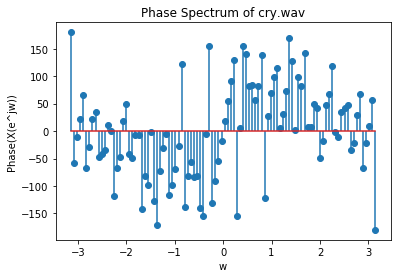

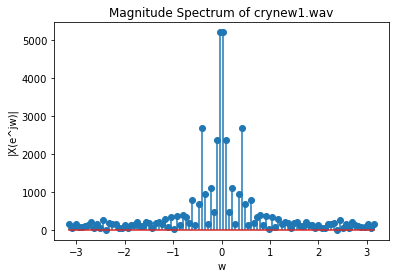

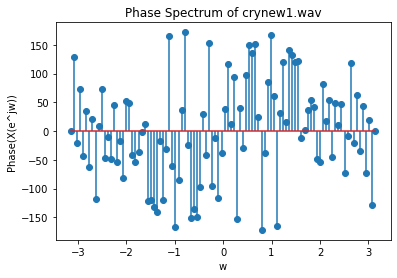

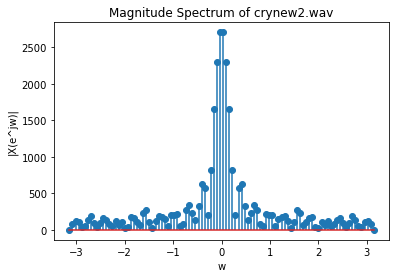

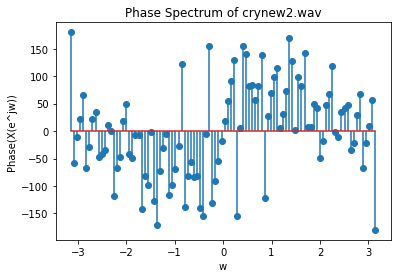

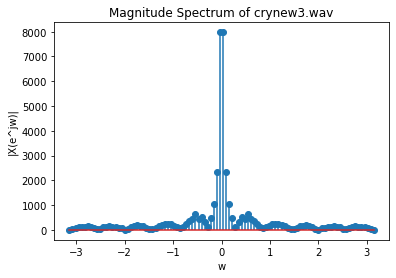

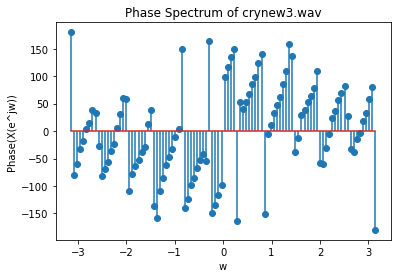

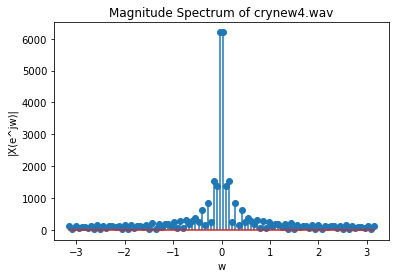

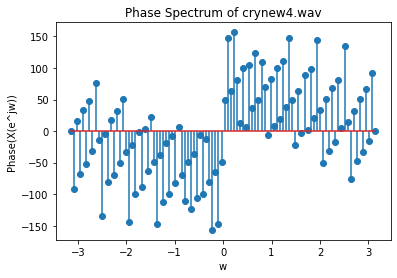

In [17]:
a1,b1,c1 = DTFT('cry.wav',w_0)
a2,b2,c2 = DTFT('crynew1.wav',w_0)
a3,b3,c3 = DTFT('crynew2.wav',w_0)
a4,b4,c4 = DTFT('crynew3.wav',w_0)
a5,b5,c5 = DTFT('crynew4.wav',w_0)


## For cry.wav: <br>
> At $f$ = 2$f_{s}$ : <br>
> The magnitude spectrum has lesser number of peaks with high amplitude in low frequency typically and less amplitude peak value at higher frequencies when compared to original wav file. <br>
> The phase spectrum is similar but there are changes in amplitude values w.r.t original wave file. <br>
<br>
> At $f$ = $f_{s}$  : <br>
> Both magnitude and phase spectrum are same as the original wave file. <br>
<br>
> At $f$ = 0.5$f_{s}$  : <br>
> The magnitude spectrum higher amplitude at low frequencies and more small peaks with lower amplitude at higher frequencies when compared to original wave file.<br>
> The phase spectrum is a little repeatation and has more preaks at all frequencies when compared to original wave file. <br>
<br>
> At $f$ = 0.25$f_{s}$  : <br>
> The magnitude spectrum has low amplitude at low frequencies  and has even low amplitude at higher frequencies compared to $f$ = 0.5$f_s$.<br>
> The phase spectrum also has low value and less number of peaks compared to $f$ = 0.5$f_s$.<br>

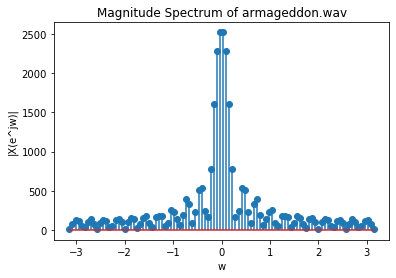

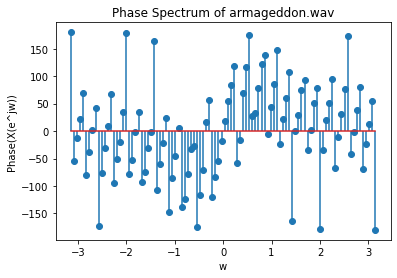

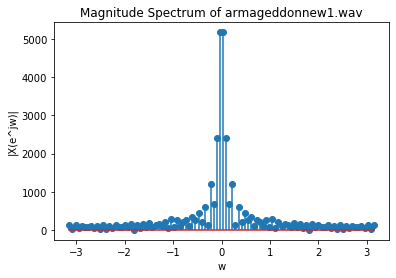

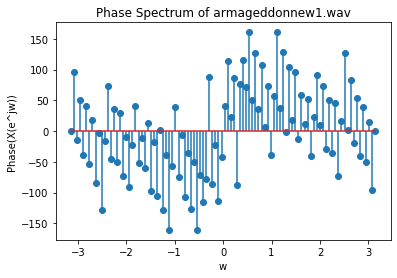

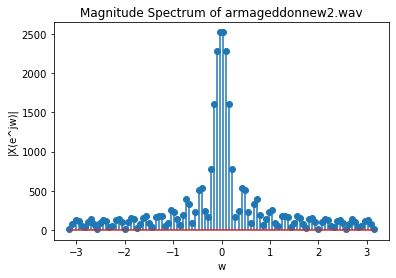

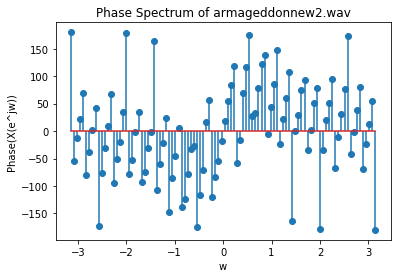

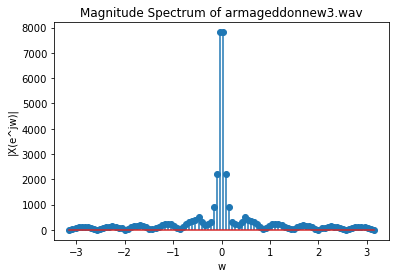

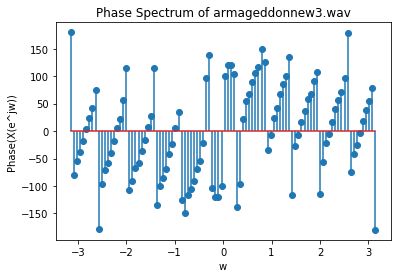

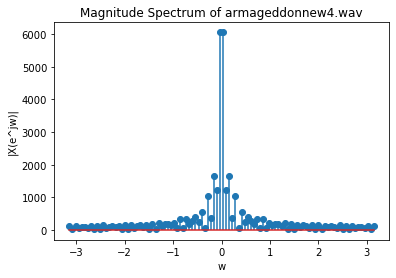

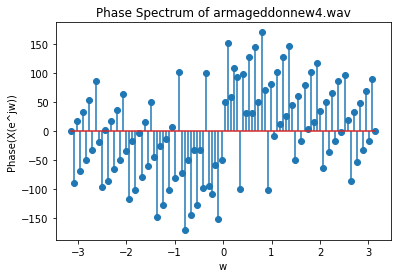

In [18]:
a1,b1,c1 = DTFT('armageddon.wav',w_0)
a2,b2,c2 = DTFT('armageddonnew1.wav',w_0)
a3,b3,c3 = DTFT('armageddonnew2.wav',w_0)
a4,b4,c4 = DTFT('armageddonnew3.wav',w_0)
a5,b5,c5 = DTFT('armageddonnew4.wav',w_0)


## For armageddon.wav: <br>
> At $f$ = 2$f_{s}$ : <br>
> The magnitude spectrum has lesser number of peaks with high amplitude in low frequency typically and less amplitude peak value at higher frequencies when compared to original wav file. <br>
> The phase spectrum is similar w.r.t original wave file. <br>
<br>
> At $f$ = $f_{s}$  : <br>
> Both magnitude and phase spectrum are same as the original wave file. <br>
<br>
> At $f$ = 0.5$f_{s}$  : <br>
> The magnitude spectrum higher amplitude at low frequencies and more small peaks with lower amplitude at higher frequencies when compared to original wave file.<br>
> The phase spectrum is a little repeatation and has more preaks at all frequencies when compared to original wave file. <br>
<br>
> At $f$ = 0.25$f_{s}$  : <br>
> The magnitude spectrum has low amplitude at low frequencies  and has even low amplitude at higher frequencies compared to $f$ = 0.5$f_s$.<br>
> The phase spectrum also has low value and less number of peaks compared to $f$ = 0.5$f_s$.<br>

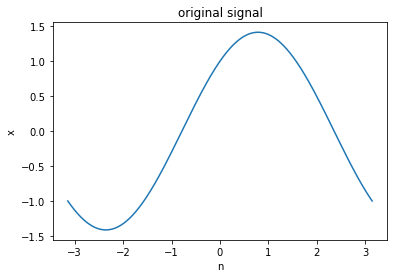

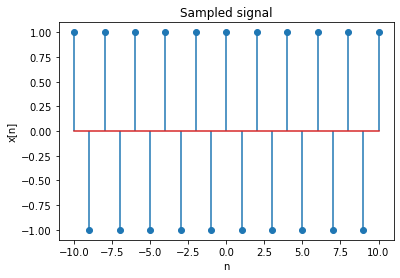

In [4]:
#1-c
f = 10                #frequency
w = 2*np.pi*f      
T = 1/(2*f)           #sampling time period
m = np.linspace(-10*T,10*T,num=21) 
n = np.linspace(-10,10,num=21)
n1 = np.linspace(-np.pi,np.pi,num=1001)
x = np.cos(w*m)+np.sin(w*m)    #sampling signal
x1 = np.cos(n1)+np.sin(n1)     #original signal
f5 = plt.figure(5)
plt.plot(n1,x1)
plt.xlabel('n')
plt.ylabel('x')
plt.title('original signal')
f6 = plt.figure(6)
plt.stem(n,x,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Sampled signal')
plt.show()   

# Observation 1-c
> As we can see our input signal is $x_a$(t) = cos(2$\pi$t)+sin(2$\pi$t).<br>
> But our sampled signal x[n] = $(-1)^n$, so if we try to reconstruct our signal we can only reconstruct the cos function but the sine will be discarded. therefore the equality condition must be omitted in nyquist sampling theorem.<br>

In [21]:
#2
def conv(x,h): # convolution function
    conv = np.zeros(len(x)+len(h)-1)        #Initializing
    for j in range(len(x)+len(h)-1):
        su=0
        for i in range(len(x)):
            if (j-i) >=0  and (j-i)<len(h):   # summingup all possible non-negative index values
                su+=x[i]*h[j-i]
            else :
                su+=0
        conv[j]=su                            # appending the array.
    return (conv) 

Convolution output is  [1. 1. 1. 1. 1. 1.]


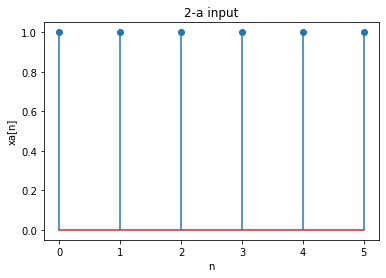

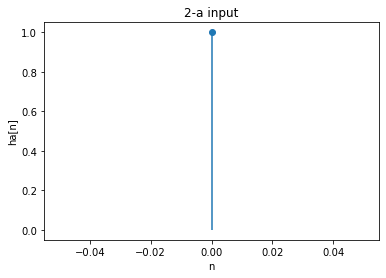

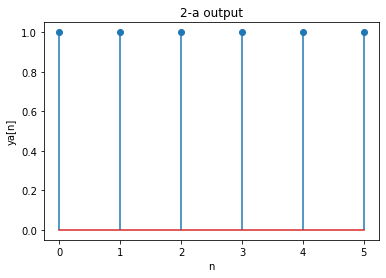

In [24]:
#2-a 
xa=[1,1,1,1,1,1]  #input sequence
ha=[1]
ya=conv(xa,ha) # using convolve function
print("Convolution output is ",ya)
f1 = plt.figure(1)
plt.stem(xa,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('xa[n]')
plt.title('2-a input')
f2 = plt.figure(2)
plt.stem(ha,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('ha[n]')
plt.title('2-a input')
f3 = plt.figure(3)
plt.stem(ya,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('ya[n]')
plt.title('2-a output')
plt.show()

Convolution output is  [1. 2. 3. 4. 5. 6. 5. 4. 3. 2. 1.]


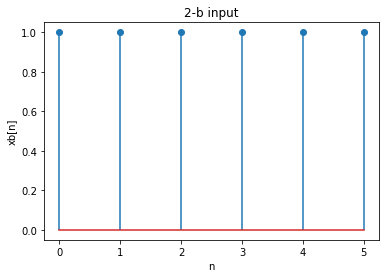

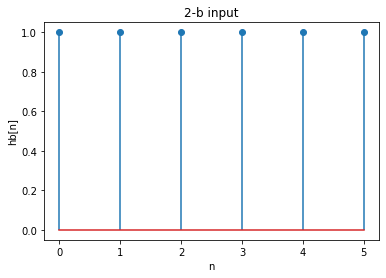

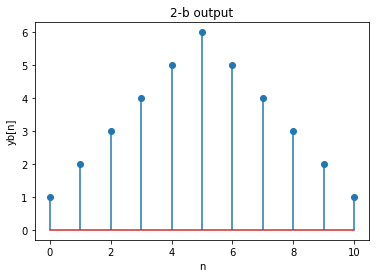

In [27]:
#2-b
xb=[1,1,1,1,1,1] #input sequence
hb=xb
yb=conv(xb,hb) # using convolve function
print("Convolution output is ",yb)
f4 = plt.figure(4)
plt.stem(xb,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('xb[n]')
plt.title('2-b input')
f5 = plt.figure(5)
plt.stem(hb,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('hb[n]')
plt.title('2-b input')
f6 = plt.figure(6)
plt.stem(yb,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('yb[n]')
plt.title('2-b output')
plt.show()

Convolution output is  [ 0.  0.  1.  4. 10. 20. 35. 44. 46. 40. 25.]


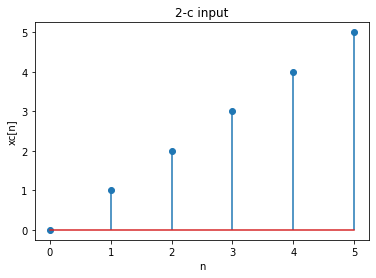

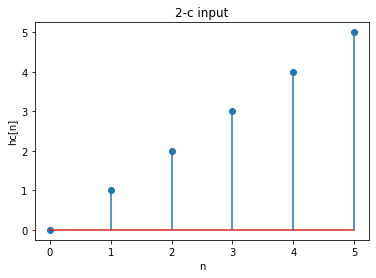

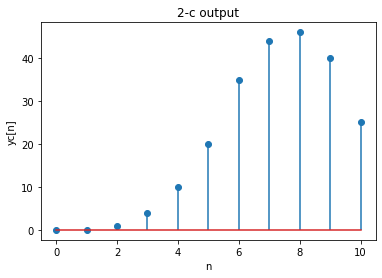

In [28]:
#2-c
xc=np.zeros(6)
for i in range(int(6)):
    xc[i]=i                 #input sequence
hc=xc
yc=conv(xc,hc) # using convolve function
print("Convolution output is ",yc)
f7 = plt.figure(7)
plt.stem(xc,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('xc[n]')
plt.title('2-c input')
f8 = plt.figure(8)
plt.stem(hc,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('hc[n]')
plt.title('2-c input')
f9 = plt.figure(9)
plt.stem(yc,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('yc[n]')
plt.title('2-c output')
plt.show()

Convolution output is  [ 0.5  0.   0.   0.   0.   0.  -0.5  0. ]


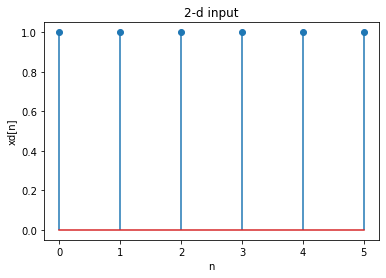

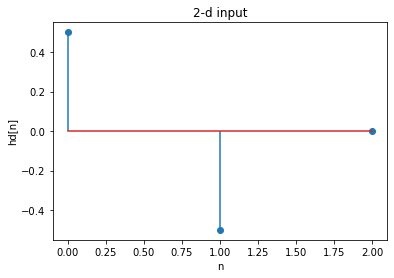

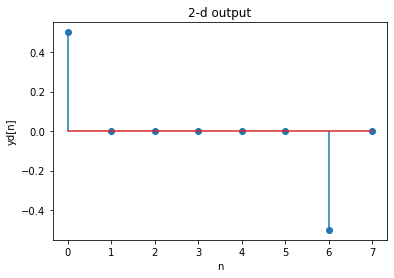

In [29]:
#2-d
xd=np.zeros(6)
for i in range(int(6)):
    xd[i]=1                 #input sequence
hd=[0.5,-0.5,0]
yd=conv(xd,hd) # using convolve function
print("Convolution output is ",yd)
f10 = plt.figure(10)
plt.stem(xd,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('xd[n]')
plt.title('2-d input')
f11 = plt.figure(11)
plt.stem(hd,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('hd[n]')
plt.title('2-d input')
f12 = plt.figure(12)
plt.stem(yd,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('yd[n]')
plt.title('2-d output')
plt.show()

Convolution output is  [ 0.5  0.   0.   0.   0.   0.  -0.5  0. ]


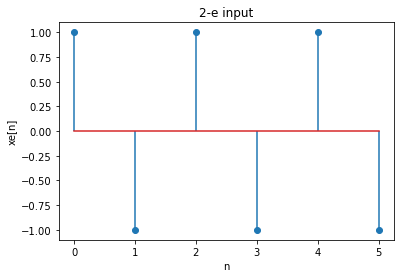

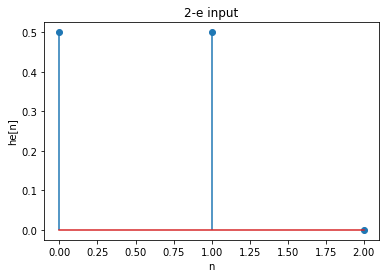

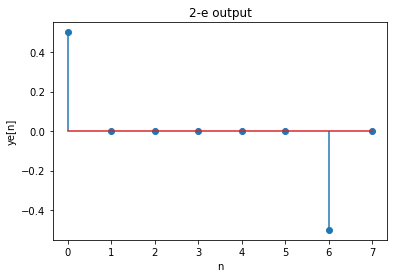

In [30]:
#2-e
xe=np.zeros(6)
for i in range(int(6)):
    xe[i]=np.cos(np.pi*i)       #input sequence
he=[0.5,0.5,0]
ye=conv(xe,he) # using convolve function
print("Convolution output is ",ye)
f13 = plt.figure(13)
plt.stem(xe,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('xe[n]')
plt.title('2-e input')
f14 = plt.figure(14)
plt.stem(he,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('he[n]')
plt.title('2-e input')
f15 = plt.figure(15)
plt.stem(ye,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('ye[n]')
plt.title('2-e output')
plt.show()

In [37]:
#3
def Audio_conv(sound_file,sound_conv,h):
    sound = wave.open(sound_file,'r') # reading the sound file
    # Extract Raw Audio from Wav File
    signal = sound.readframes(-1)  #Reading the all the frames of audio signal into bytes
    s = np.frombuffer(signal,dtype=np.uint8) # converting bytes to nparray
    f_rate = sound.getframerate() # finding the framerate of the audio signal
    g = sound.getsampwidth()
    sound.close()
    soundnew = wave.open(sound_conv,'wb')      # opening new wave file
    if f_rate <= len(s):
        s1 = s[0:f_rate-1]                     # picking 1 second worth of file  
    else:
        s1 = s                                 # using the same file if duration of audio is less than 1 second
    Audio_conv = conv(s1,h)
    data = Audio_conv.astype(np.uint8)         # converting array to int8 
    soundnew.setnchannels(1)                   # setting channels
    soundnew.setsampwidth(1)                   # setting sample width
    soundnew.setframerate(f_rate)              # setting frame rate
    soundnew.writeframesraw(data)              # writing data to frames
    soundnew.close()
    return (Audio_conv)

In [38]:
#3-a
ha=[0.33,0.33,0.33]
a=Audio_conv('armageddon.wav','armageddonconv.wav',ha)
playsound('armageddonconv.wav')
b=Audio_conv('alarm.wav','alarmconv.wav',ha)
playsound('alarmconv.wav')
c=Audio_conv('cry.wav','cryconv.wav',ha)
playsound('cryconv.wav')
d=Audio_conv('wow.wav','wowconv.wav',ha)
playsound('wowconv.wav')

# Observations 3-a
> The audio is actually same it's just scaled so we cannot really see the difference between convolved audio and original audio.

In [39]:
#3-b
hb=[-0.25,0.5,-0.25]
a=Audio_conv('armageddon.wav','armageddonconv2.wav',hb)
playsound('armageddonconv2.wav')
b=Audio_conv('alarm.wav','alarmconv2.wav',hb)
playsound('alarmconv2.wav')
c=Audio_conv('cry.wav','cryconv2.wav',hb)
playsound('cryconv2.wav')
d=Audio_conv('wow.wav','wowconv2.wav',hb)
playsound('wowconv2.wav')

# 3-b
> There is an addition of noise to the audio but we can still  recognize the original audio